In [1]:

import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Import dataset

In [2]:
df = pd.read_csv("Heart Attack.csv")

# Call DataSet

In [3]:
df

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


# Info DataSet

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


# Checking Missing Value and Duplicated Data

In [5]:
df.isna().sum()

age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64

In [6]:
df.duplicated().sum()

0

# Change class to numeric 1 = Positive, 0 Negative

In [7]:
from sklearn import preprocessing

In [8]:
#untuk mengubah jadi 1 0 pake label encoder aja jadi import sklearn from preprocessing
label_encoder = preprocessing.LabelEncoder()

In [9]:
#kalau mau ngubah nomornya, panggil kkolomnya lalu pakai fit transform
df["class"] = label_encoder.fit_transform(df["class"])

In [10]:
df

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,0
1315,66,1,84,125,55,149.0,1.33,0.172,1
1316,45,1,85,168,104,96.0,1.24,4.250,1
1317,54,1,58,117,68,443.0,5.80,0.359,1


# Looking distribution Data

In [11]:
df.skew()

age              -0.239219
gender           -0.674363
impluse          18.247720
pressurehight     0.685246
pressurelow       0.489202
glucose           1.933475
kcm               4.978095
troponin          5.799107
class            -0.469310
dtype: float64

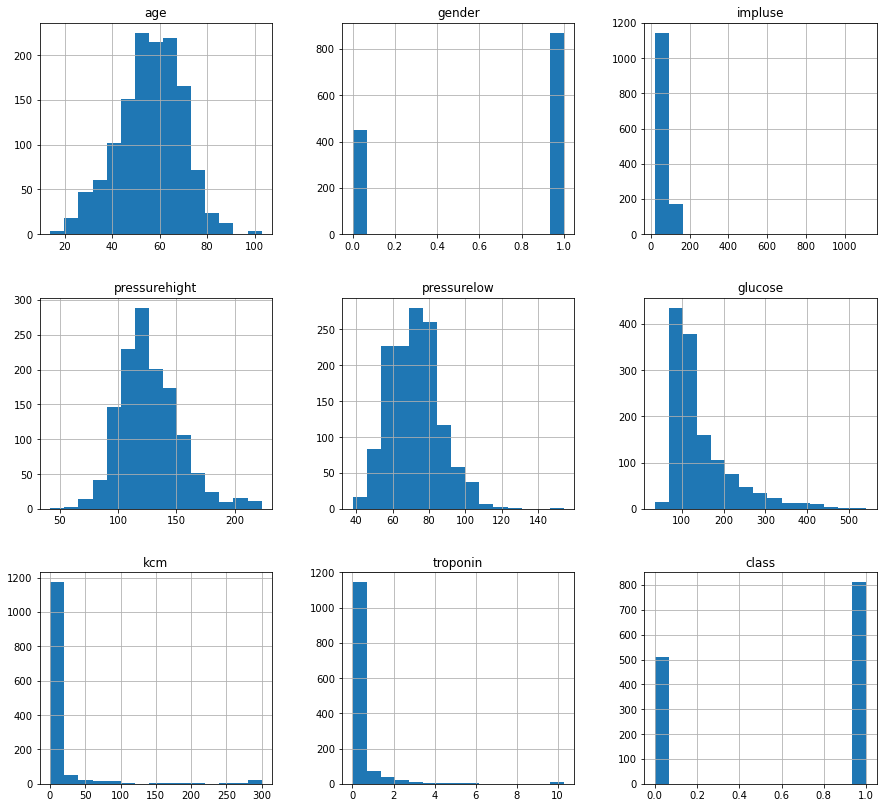

In [12]:
df.hist(figsize=(15,14), layout=(3,3), bins=15);

# Cheking outlier

## all feature

<AxesSubplot:title={'center':'All outlier'}>

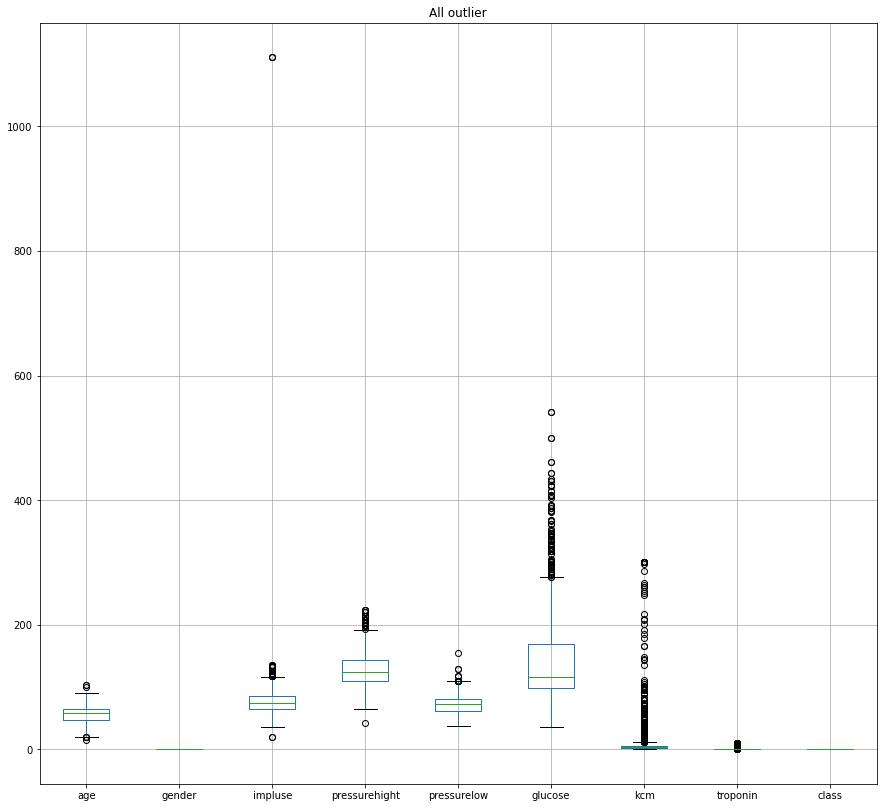

In [13]:
plt.figure(figsize=(15,14))
plt.title("All outlier")
df.boxplot()

## Remove outlier

In [14]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3-q1
print(iqr)

age              18.0000
gender            1.0000
impluse          21.0000
pressurehight    33.0000
pressurelow      19.0000
glucose          71.5000
kcm               4.1500
troponin          0.0795
class             1.0000
dtype: float64


In [15]:
lowerbound = q1 - iqr *1.5
upperbound = q3+iqr *1.5

In [16]:
print(lowerbound)
print(upperbound)

age              20.00000
gender           -1.50000
impluse          32.50000
pressurehight    60.50000
pressurelow      33.50000
glucose          -9.25000
kcm              -4.57000
troponin         -0.11325
class            -1.50000
dtype: float64
age               92.00000
gender             2.50000
impluse          116.50000
pressurehight    192.50000
pressurelow      109.50000
glucose          276.75000
kcm               12.03000
troponin           0.20475
class              2.50000
dtype: float64


In [17]:
df_no_outlier = df[~((df>upperbound)|(df<lowerbound)).any(axis=1)]

#kalau any itu ketika salah satu tidak memenuhi syarata langsung di kick
#kalau all ya kalau satu ga memenuhi syarat brati salah

In [18]:
df_no_outlier.shape

(789, 9)

<AxesSubplot:title={'center':'No outlier'}>

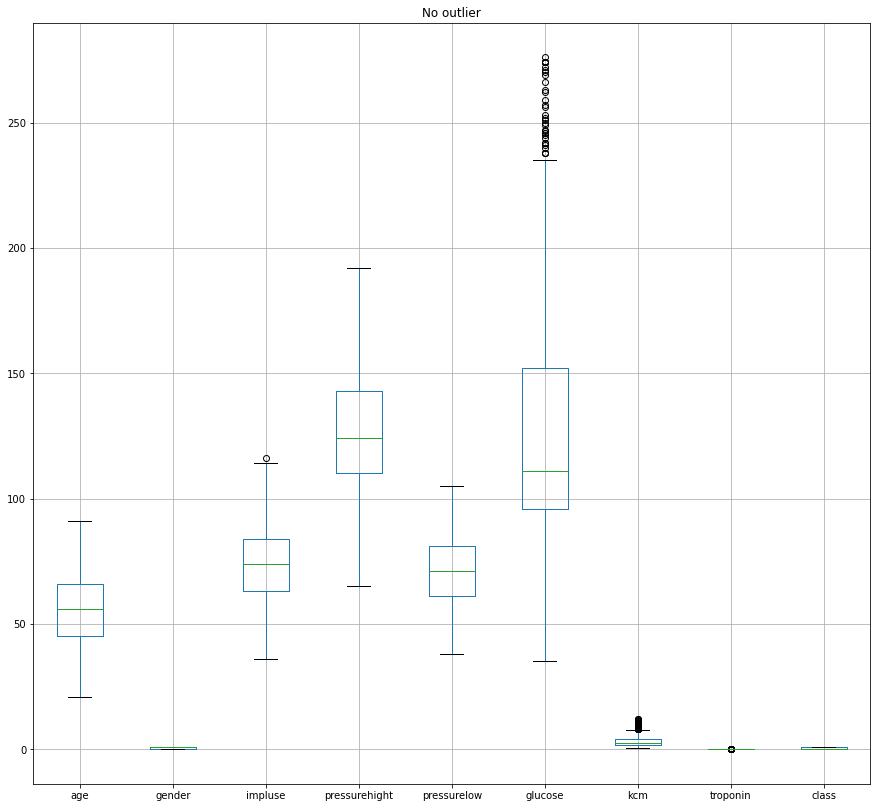

In [19]:
plt.figure(figsize=(15,14))
plt.title("No outlier")
df_no_outlier.boxplot()

In [20]:
q1 = df_no_outlier.quantile(0.25)
q3 = df_no_outlier.quantile(0.75)
iqr = q3-q1
print(iqr)

age              21.000
gender            1.000
impluse          21.000
pressurehight    33.000
pressurelow      20.000
glucose          56.000
kcm               2.500
troponin          0.018
class             1.000
dtype: float64


In [21]:
lowerbound = q1 - iqr *1.5
upperbound = q3+iqr *1.5

In [22]:
df_no_outlier2 = df_no_outlier[~((df_no_outlier>upperbound)|(df_no_outlier<lowerbound)).any(axis=1)]

In [23]:
df_no_outlier2.shape

(623, 9)

<AxesSubplot:title={'center':'No outlier 2'}>

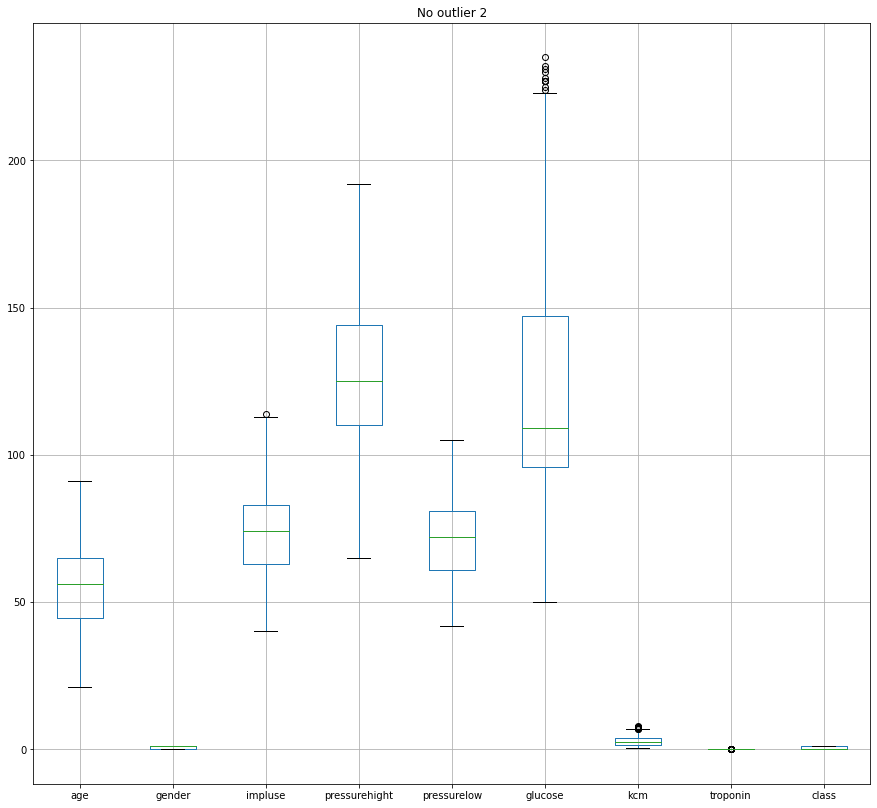

In [24]:
plt.figure(figsize=(15,14))
plt.title("No outlier 2")
df_no_outlier2.boxplot()

In [25]:
q1 = df_no_outlier2.quantile(0.25)
q3 = df_no_outlier2.quantile(0.75)
iqr = q3-q1
print(iqr)

lowerbound = q1 - iqr *1.5
upperbound = q3+iqr *1.5

age              20.500
gender            1.000
impluse          20.000
pressurehight    34.000
pressurelow      20.000
glucose          51.000
kcm               2.145
troponin          0.012
class             1.000
dtype: float64


In [26]:
df_no_outlier3 = df_no_outlier2[~((df_no_outlier>upperbound)|(df_no_outlier<lowerbound)).any(axis=1)]

In [27]:
df_no_outlier3.shape

(567, 9)

<AxesSubplot:title={'center':'No outlier 3'}>

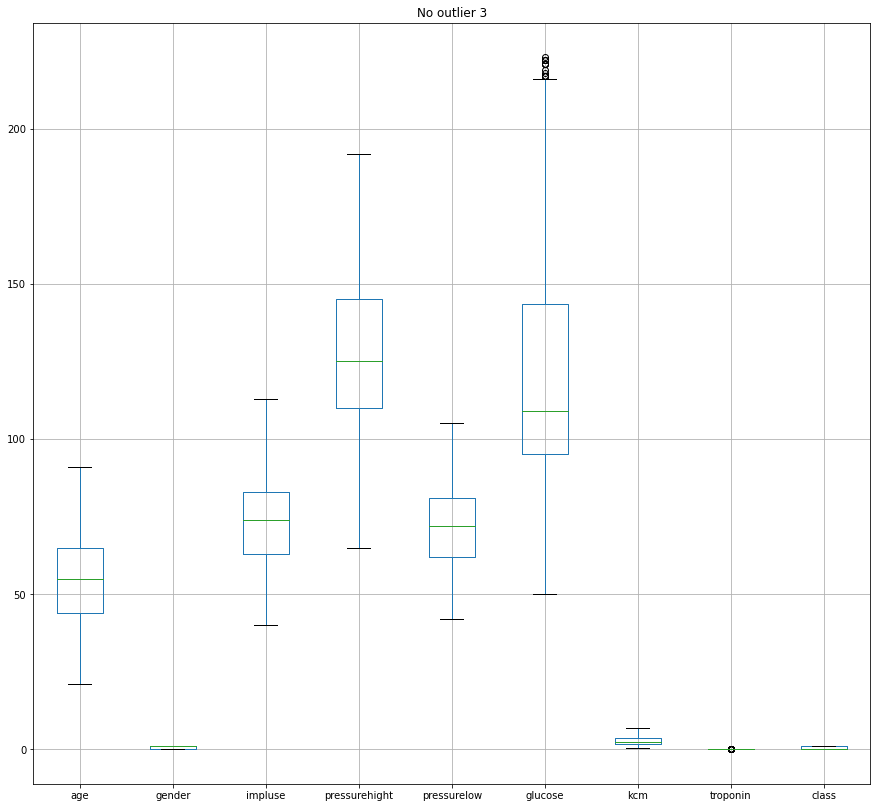

In [28]:
plt.figure(figsize=(15,14))
plt.title("No outlier 3")
df_no_outlier3.boxplot()

## Persentase outlier yang dihilangkan

In [29]:
data_penuh = df.shape[0]
outlier1 = df.shape[0]-df_no_outlier.shape[0]
outlier2 = df.shape[0]-df_no_outlier2.shape[0]
outlier3 = df.shape[0]-df_no_outlier3.shape[0]

In [30]:
print(data_penuh)
print(outlier1)
print(outlier2)
print(outlier3)

1319
530
696
752


In [31]:
a = round((outlier1/data_penuh)*100)
b = round((outlier2/data_penuh)*100)
c = round((outlier3/data_penuh)*100)

In [32]:
print(a,"%")
print(b,"%")
print(c,"%")

40 %
53 %
57 %


Karena banyak abget data ilang, kita pakai yang 40% saja

In [33]:
df_no_outlier[df_no_outlier["class"]==1]

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
15,61,1,81,118,66,134.0,1.49,0.017,1
19,45,1,60,109,65,89.0,1.60,0.020,1
32,68,1,61,121,49,98.0,6.48,0.021,1
35,64,1,58,156,76,82.0,6.78,0.012,1
43,55,1,97,105,80,100.0,2.97,0.146,1
...,...,...,...,...,...,...,...,...,...
1293,53,1,55,120,79,114.0,2.93,0.030,1
1301,47,0,58,93,78,170.0,1.19,0.068,1
1303,55,0,80,117,83,200.0,0.78,0.052,1
1311,85,1,112,115,69,114.0,2.19,0.062,1


In [34]:
df_no_outlier[df_no_outlier["class"]==0]

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,0
2,55,1,64,160,77,270.0,1.99,0.003,0
5,58,0,61,112,58,87.0,1.83,0.004,0
6,32,0,40,179,68,102.0,0.71,0.003,0
8,44,0,60,154,81,135.0,2.35,0.004,0
...,...,...,...,...,...,...,...,...,...
1298,67,0,81,150,75,80.0,4.80,0.009,0
1299,62,1,90,136,68,141.0,1.83,0.014,0
1312,48,1,84,118,68,96.0,5.33,0.006,0
1313,86,0,40,179,68,147.0,5.22,0.011,0


# Modeling

In [35]:
from sklearn.preprocessing import minmax_scale, scale, normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,roc_auc_score,roc_curve, auc

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

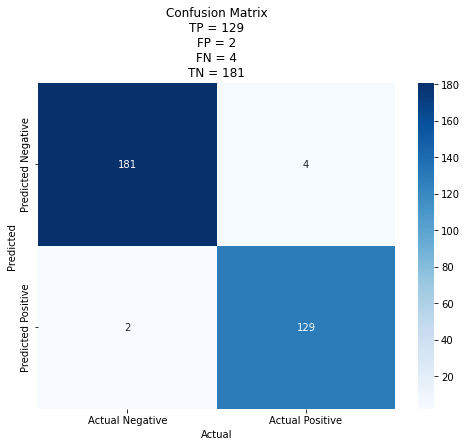

In [40]:
modelgbr = GradientBoostingClassifier()
modelgbr.fit(X_train, y_train)
predictiongbr = modelgbr.predict(X_test)

# Hitung matriks konfusi
confusion = confusion_matrix(y_test, predictiongbr)

# Ambil nilai TP, FP, FN, TN dari matriks konfusi
TP = confusion[1, 1]
FP = confusion[0, 1]
FN = confusion[1, 0]
TN = confusion[0, 0]

# Visualisasikan matriks konfusi dengan heatmap (diputar)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion.T, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Actual Negative', 'Actual Positive'],
            yticklabels=['Predicted Negative', 'Predicted Positive'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix\nTP = {}\nFP = {}\nFN = {}\nTN = {}'.format(TP, FP, FN, TN))
plt.show()


              precision    recall  f1-score   support

           0       0.98      0.99      0.98       183
           1       0.98      0.97      0.98       133

    accuracy                           0.98       316
   macro avg       0.98      0.98      0.98       316
weighted avg       0.98      0.98      0.98       316

AUC: 0.99


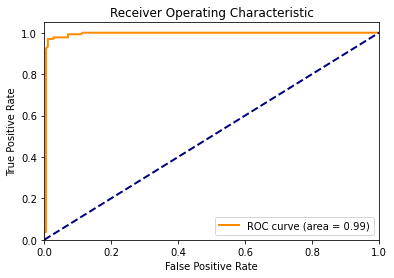

In [41]:
modelgbr = GradientBoostingClassifier()
modelgbr.fit(X_train, y_train)
predictiongbr = modelgbr.predict(X_test)
print(classification_report(y_test, predictiongbr))

# Menggunakan predict_proba pada objek modelgbr
probas = modelgbr.predict_proba(X_test)[:, 1]  # Ambil probabilitas kelas positif

fpr, tpr, _ =   roc_curve(y_test, probas)
roc_auc = auc(fpr, tpr)
import matplotlib.pyplot as plt

# Cetak AUC
print("AUC: {:.2f}".format(roc_auc))

# Gambarkan kurva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
